# Regressão Linear para Estimar Preços de Imóveis


Este notebook utiliza a bibiloteca sklearn para estimar preço de aluguel de imóveis, baseado em variáveis do imóvel. Dataset público do Kaggle com 10.692 Imóveis em 5 cidades diferentes. Atualizado em Maio de 2020 



Robson Müller 29/07/2020

* Criei esse notebook como reforço de aprendizagem e com base nos conteúdos dos módulos de Machine Learning e Analise de Dados para a Certificação Profissional em Data Science da IBM 2020. 

-- -- -- -- -- -- ---- -- -- -- -- -- ---- -- -- -- -- -- ---- -- -- -- -- -- ---- -- -- -- -- -- --

Setup e Import das biblitocas que iremos usar

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Criação do DataFrame e importação do Banco de Dados

In [290]:
df = pd.read_csv('houses_to_rent_v2.csv',sep=',')
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


Os nomes das colunas e algumas informações descritivas estão em inglês. Vamos trocar para português

In [291]:
colunas = ['Cidade','Area','Quartos','Banheiros','Vaga_estac','Andar',
           'Permite_pet','Mobilia','hoa (R$)','Aluguel','Condominio',
           'Seguro_incendio','total (R$)']

df.columns = colunas

In [292]:
df = df.replace(to_replace = 'acept',value = 'sim')
df = df.replace(to_replace = 'not acept',value = 'nao')
df = df.replace(to_replace = 'furnished',value = 'sim')
df = df.replace(to_replace = 'not furnished',value = 'nao')

A informação do Andar do imóvel está no formato de objeto. Vamos transformá-la em 'numero'

In [293]:
print(df.dtypes)


Cidade             object
Area                int64
Quartos             int64
Banheiros           int64
Vaga_estac          int64
Andar              object
Permite_pet        object
Mobilia            object
hoa (R$)            int64
Aluguel             int64
Condominio          int64
Seguro_incendio     int64
total (R$)          int64
dtype: object


In [294]:
df['Andar'] = df["Andar"].replace('-','0')
df['Andar'] = df['Andar'].astype('int')

Uma variável não presente em nosso DataFrame é o preço do m2 dos imóveis. Vamos adicioná-la. 

In [295]:
df['preco_m2'] = df['Aluguel'] / df['Area']

Pronto. Agora podemos checar como os dados ficaram após um breve tratamento

In [296]:
df.head(10)

,Cidade,Area,Quartos,Banheiros,Vaga_estac,Andar,Permite_pet,Mobilia,hoa (R$),Aluguel,Condominio,Seguro_incendio,total (R$),preco_m2
0,São Paulo,70,2,1,1,7,sim,sim,2065,3300,211,42,5618,47.142857
1,São Paulo,320,4,4,0,20,sim,nao,1200,4960,1750,63,7973,15.500000
2,Porto Alegre,80,1,1,1,6,sim,nao,1000,2800,0,41,3841,35.000000
3,Porto Alegre,51,2,1,0,2,sim,nao,270,1112,22,17,1421,21.803922
4,São Paulo,25,1,1,0,1,nao,nao,0,800,25,11,836,32.000000
5,São Paulo,376,3,3,7,0,sim,nao,0,8000,834,121,8955,21.276596
6,Rio de Janeiro,72,2,1,0,7,sim,nao,740,1900,85,25,2750,26.388889
7,São Paulo,213,4,4,4,4,sim,nao,2254,3223,1735,41,7253,15.131455
8,São Paulo,152,2,2,1,3,sim,sim,1000,15000,250,191,16440,98.684211
9,Rio de Janeiro,35,1,1,0,2,sim,sim,590,2300,35,30,2955,65.714286


In [297]:
df.describe()

,Area,Quartos,Banheiros,Vaga_estac,Andar,hoa (R$),Aluguel,Condominio,Seguro_incendio,total (R$),preco_m2
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03,33.426097
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04,22.831340
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02,0.125668
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03,18.571429
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03,26.666667
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03,40.714286
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06,300.000000


In [298]:
df.describe(include = ['object'])

,Cidade,Permite_pet,Mobilia
count,10692,10692,10692
unique,5,2,2
top,São Paulo,sim,nao
freq,5887,8316,8086


Vejamos. Para aplicar um algoritmo de regressão os dados precisam estar normalizados. Isso quer dizer, onde existam variáveis com valores muito discrepantes, como é o caso da área do Imóvel, que tem um desvio padrão de 537. Iremos aplicar uma das possíveis técnicas, que é: (valor/valor(max)) assim teremos um intervalo de 0 à 1 para este dado. Porém antes vamos checar os 'outliers' para esta informação.

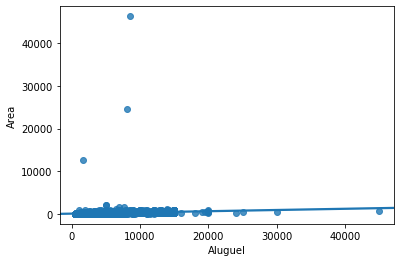

In [299]:
sns.regplot(x='Aluguel',y='Area',data=df)

Notamos que existem 3 outliers com Area do Imóvel superior à 10.000m2. Vamos remove-los.

In [300]:
df = df[df.Area < 10000]

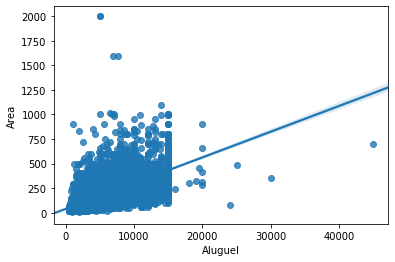

In [301]:
sns.regplot(x='Aluguel',y='Area',data=df)

In [302]:
df['Area'] = df['Area'] / df['Area'].max()
df['Condominio'] = df['Condominio'] / df['Condominio'].max()
df['Seguro_incendio'] = df['Seguro_incendio'] / df['Seguro_incendio'].max()

In [303]:
df[['Seguro_incendio','Condominio','Area']].head(10)

,Seguro_incendio,Condominio,Area
0,0.062038,0.000673,0.0350
1,0.093058,0.005579,0.1600
2,0.060561,0.000000,0.0400
3,0.025111,0.000070,0.0255
4,0.016248,0.000080,0.0125
5,0.178730,0.002659,0.1880
6,0.036928,0.000271,0.0360
7,0.060561,0.005531,0.1065
8,0.282127,0.000797,0.0760
9,0.044313,0.000112,0.0175


In [304]:
df.head(10)

,Cidade,Area,Quartos,Banheiros,Vaga_estac,Andar,Permite_pet,Mobilia,hoa (R$),Aluguel,Condominio,Seguro_incendio,total (R$),preco_m2
0,São Paulo,0.0350,2,1,1,7,sim,sim,2065,3300,0.000673,0.062038,5618,47.142857
1,São Paulo,0.1600,4,4,0,20,sim,nao,1200,4960,0.005579,0.093058,7973,15.500000
2,Porto Alegre,0.0400,1,1,1,6,sim,nao,1000,2800,0.000000,0.060561,3841,35.000000
3,Porto Alegre,0.0255,2,1,0,2,sim,nao,270,1112,0.000070,0.025111,1421,21.803922
4,São Paulo,0.0125,1,1,0,1,nao,nao,0,800,0.000080,0.016248,836,32.000000
5,São Paulo,0.1880,3,3,7,0,sim,nao,0,8000,0.002659,0.178730,8955,21.276596
6,Rio de Janeiro,0.0360,2,1,0,7,sim,nao,740,1900,0.000271,0.036928,2750,26.388889
7,São Paulo,0.1065,4,4,4,4,sim,nao,2254,3223,0.005531,0.060561,7253,15.131455
8,São Paulo,0.0760,2,2,1,3,sim,sim,1000,15000,0.000797,0.282127,16440,98.684211
9,Rio de Janeiro,0.0175,1,1,0,2,sim,sim,590,2300,0.000112,0.044313,2955,65.714286


Vamos utilizar um comando chamado .corr() para checar a Correlação linear entre as variáveis deste DataFrame. Quanto mais próximo de 1, maior a indicação de lineariedade entre as variáveis, somado ao P-value, que nos indica o grau de confiabilidade da relação. Será nosso guia para escolher as melhores variáveis para a construção do modelo preditivo

In [305]:
df.corr()

,Area,Quartos,Banheiros,Vaga_estac,Andar,hoa (R$),Aluguel,Condominio,Seguro_incendio,total (R$),preco_m2
Area,1.000000,0.693961,0.755601,0.690387,-0.098790,0.027073,0.664135,0.112982,0.699326,0.186236,-0.271702
Quartos,0.693961,1.000000,0.733880,0.617405,-0.079050,0.007130,0.541634,0.074807,0.565066,0.134459,-0.314905
Banheiros,0.755601,0.733880,1.000000,0.697224,0.004384,0.050311,0.668525,0.109058,0.676461,0.208321,-0.159296
Vaga_estac,0.690387,0.617405,0.697224,1.000000,-0.021166,0.009315,0.578169,0.098075,0.597191,0.148559,-0.146877
Andar,-0.098790,-0.079050,0.004384,-0.021166,1.000000,0.019867,0.073341,0.012362,0.013406,0.036321,0.229854
hoa (R$),0.027073,0.007130,0.050311,0.009315,0.019867,1.000000,0.036488,0.007614,0.029532,0.955052,0.000367
Aluguel,0.664135,0.541634,0.668525,0.578169,0.073341,0.036488,1.000000,0.107638,0.987341,0.264408,0.274651
Condominio,0.112982,0.074807,0.109058,0.098075,0.012362,0.007614,0.107638,1.000000,0.105455,0.218231,0.000522
Seguro_incendio,0.699326,0.565066,0.676461,0.597191,0.013406,0.029532,0.987341,0.105455,1.000000,0.254836,0.228449
total (R$),0.186236,0.134459,0.208321,0.148559,0.036321,0.955052,0.264408,0.218231,0.254836,1.000000,0.057888


Vamos checar visualmente o relacionamento linear positivo entre as variáveis que mais chamaram a atenção, utilizando regplot do Seaborn

(0, 47267.01496852488)

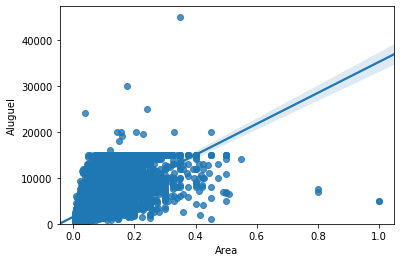

In [306]:
sns.regplot(x="Area", y="Aluguel", data=df)
plt.ylim(0,)

Area do Imóvel sobe, preço do Aluguel sobe. Aparenta ser um bom preditor. Vamos para mais... 

(0, 53177.48049632492)

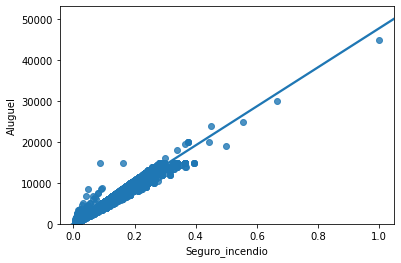

In [307]:
sns.regplot(x="Seguro_incendio", y="Aluguel", data=df)
plt.ylim(0,)

Testamos diveras opções. As duas melhores parecem ser o valor do Seguro de Incendio e a Area total do imóvel. No momento da formulação do problema, o valor do condominio ficou como hipotese de impactar fortemente o valor do aluguel. Porém, na análise se mostrou próximo de zero.

Até então checamos a relação com informações numéricas. Agora vamos checar a relação com informações categóricas. 

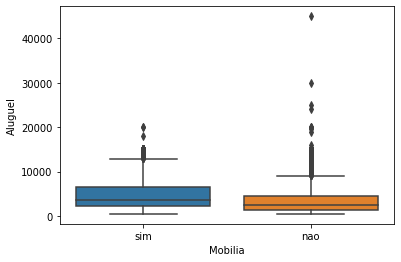

In [308]:
sns.boxplot(x="Mobilia", y="Aluguel", data=df)

Os imóveis mobiliados tem uma média de valores maior. Porém os sem mobilia tem diversos outliers que superam até mesmo os mobiliados. 

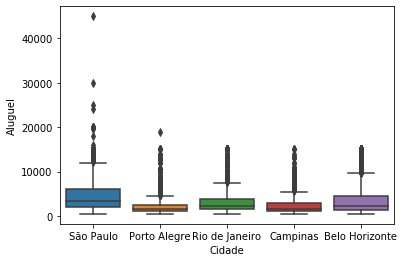

In [309]:
sns.boxplot(x="Cidade", y="Aluguel", data=df)

Os Imóveis de São Paulo tem a maior média de valores. E também onde se concentram os maiores outliers

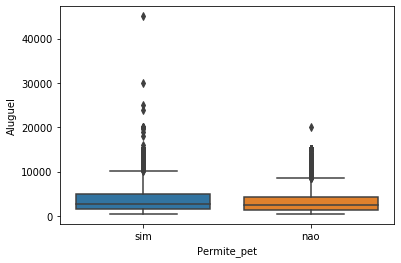

In [310]:
sns.boxplot(x="Permite_pet", y="Aluguel", data=df)

Imóveis que permitem pet tem uma maior variância de valores. Iremos analisar mais adiante

In [311]:
df['Mobilia'].value_counts()

nao    8084
sim    2605
Name: Mobilia, dtype: int64

In [312]:
df['Cidade'].value_counts()

São Paulo         5886
Rio de Janeiro    1501
Belo Horizonte    1257
Porto Alegre      1193
Campinas           852
Name: Cidade, dtype: int64

In [313]:
df['Permite_pet'].value_counts()

sim    8313
nao    2376
Name: Permite_pet, dtype: int64

In [337]:
df_filtro_grupo = df[['Cidade','Mobilia','Permite_pet','Aluguel']]
df_agrupado = df_filtro_grupo.groupby(['Cidade','Mobilia','Permite_pet'],as_index=False).mean()
df_agrupado.sort_values(by='Aluguel',ascending=False)

,Cidade,Mobilia,Permite_pet,Aluguel
19,São Paulo,sim,sim,5767.609306
3,Belo Horizonte,sim,sim,5648.897436
18,São Paulo,sim,nao,5086.779736
17,São Paulo,nao,sim,4564.211550
15,Rio de Janeiro,sim,sim,4335.485816
14,Rio de Janeiro,sim,nao,3980.580645
1,Belo Horizonte,nao,sim,3613.729397
16,São Paulo,nao,nao,3418.083070
11,Porto Alegre,sim,sim,3267.295833
7,Campinas,sim,sim,3167.150000


Show. Temos um relacionamento de Preço de Aluguel X variáveis Categoricas. Podemos observar que os imóveis no topo da lista estão em SP e BH

Agora que temos as variáveis discretas (Seguro e Area) e as Categorias (Mobilia, Permite_Pet e Cidade) pré-escolhidas. Vamos checar correlação de Pearson para as discretas e a análise de variância (ANOVA) para as categoricas, para checar a significância estatística e escolher as melhores opções para nutrir o modelo de regressão.

In [338]:
from scipy import stats

Vamos calcular a correlação e o valor P para Seguro_incendio

In [339]:
pearson_coef, p_value = stats.pearsonr(df['Seguro_incendio'], df['Aluguel'])
print("O Coeficiente de Pearson é: ", pearson_coef, " com um valor-P de: ", p_value)

O Coeficiente de Pearson é:  0.9873411083073933  com um valor-P de:  0.0


Com um valor-P menor de 0.001, A correlação entre Seguro_incendio e Aluguel é statisticamente significante, e a correlação linear é altíssima (~0.98)

Agora, Vamos calcular a correlação e o valor P para Area

In [340]:
pearson_coef, p_value = stats.pearsonr(df['Area'], df['Aluguel'])
print("O Coeficiente de Pearson é: ", pearson_coef, " com um valor-P de: ", p_value)

O Coeficiente de Pearson é:  0.6641350839339499  com um valor-P de:  0.0


Com um valor-P menor de 0.001, A correlação entre Area e Aluguel é statisticamente significante, porém a correlação linear é menor, mas ainda significante (~0.66)

Perfeito. Confirmamos o uso das duas variaveis discretas Seguro_incendio e Area para a construcao de nosso modelo. Tendo duas variáveis já sabemos que nosos modelo será uma Regressão Linear Múltipla, ao invés de uma Regressão Simples. 

Utilizaremos agora a ANOVA (Analise de Variância) que checa a variancia entre grupos distintos para a mesma variável. Neste caso o preço de aluguel do Imóvel.

In [349]:
agrupado_cidade = df[['Cidade', 'Aluguel']].groupby(['Cidade'])
agrupado_cidade.head(2)

,Cidade,Aluguel
0,São Paulo,3300
1,São Paulo,4960
2,Porto Alegre,2800
3,Porto Alegre,1112
6,Rio de Janeiro,1900
9,Rio de Janeiro,2300
11,Campinas,580
15,Campinas,8000
21,Belo Horizonte,2690
27,Belo Horizonte,1500


In [354]:
f_val, p_val = stats.f_oneway(agrupado_cidade.get_group('São Paulo')['Aluguel'], 
                              agrupado_cidade.get_group('Porto Alegre')['Aluguel'], 
                              agrupado_cidade.get_group('Rio de Janeiro')['Aluguel'],
                              agrupado_cidade.get_group('Belo Horizonte')['Aluguel'],
                              agrupado_cidade.get_group('Campinas')['Aluguel'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 208.46535582456877 , P = 1.7239052351863267e-172


Um valor F alto significa alto grau de correlação entre cidade e valor de Aluguel. E um valor-P baixo demonstra significancia estatistica. Vejamos para os próximos grupos

In [350]:
agrupado_mobilia = df[['Mobilia', 'Aluguel']].groupby(['Mobilia'])
agrupado_mobilia.head(2)

,Mobilia,Aluguel
0,sim,3300
1,nao,4960
2,nao,2800
8,sim,15000


In [356]:
f_val, p_val = stats.f_oneway(agrupado_mobilia.get_group('sim')['Aluguel'], 
                              agrupado_mobilia.get_group('nao')['Aluguel'], 
                              )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 295.7532181802769 , P = 2.0966351331620316e-65


In [351]:
agrupado_pet = df[['Permite_pet', 'Aluguel']].groupby(['Permite_pet'])
agrupado_pet.head(2)

,Permite_pet,Aluguel
0,sim,3300
1,sim,4960
4,nao,800
17,nao,3500


In [357]:
f_val, p_val = stats.f_oneway(agrupado_pet.get_group('sim')['Aluguel'], 
                              agrupado_pet.get_group('nao')['Aluguel'], 
                              )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 49.16831817313429 , P = 2.491053746830355e-12


Com este estudo pudemos compreender melhor quais variáveis utilizaremos em nosso modelo:

* Discretas:
    - Seguro Incendio
    - Area
    
* Categoricas:
    - Cidade
    - Mobilia


In [359]:
from sklearn.linear_model import LinearRegression

Vamos iniciar a construção do Modelo. Utilizando os parâmetros discretos da análise anterior, iniciando um objeto Regressão Linear

In [360]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vamos associar as variáveis necessárias aos parâmetros da função

In [372]:
#Normalmente se usa a letra X para os parâmetros independentes, porém vou deixá-lo em aberto. 
#Caso haja a necessidade de testar Regressão Simples

Y = df['Aluguel']
Z = df[['Area','Seguro_incendio']]

In [373]:
lm.fit(Z,df['Aluguel'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [376]:
lm.intercept_

188.9413031085105

In [377]:
lm.coef_

array([-2615.55789839, 49436.59332982])

Com a aplicação do Modelo. Temos como produto o Intercept e o Coef. Que são as constantes aplicadas na fórmula da regressão. 

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

ou seja: Y estimado = intercpet + coef * variável_independente(Area) + coef * variável_independente(Seguro_incendio)


In [382]:
Y_hat = lm.predict(Z)

Vamos analisar de maneira gráfica. E comparar os valores apurados com os valores reais. 

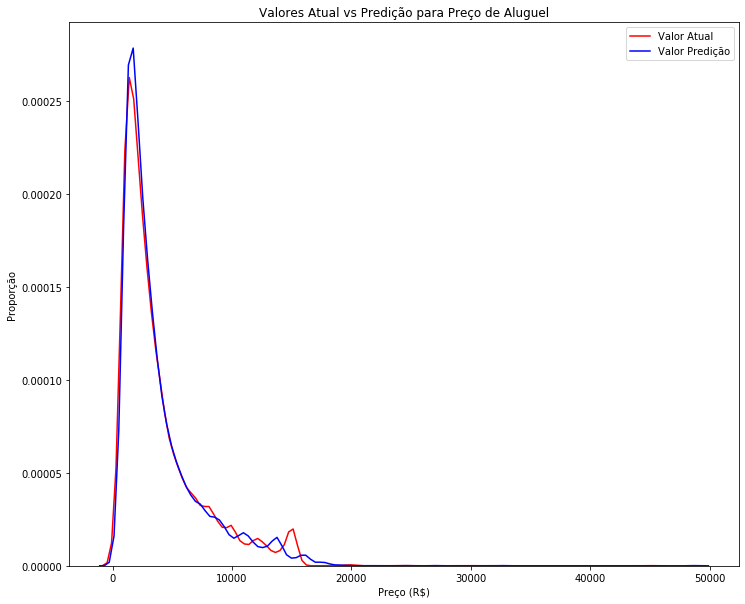

In [392]:
width = 12
height = 10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Aluguel'], hist=False, color="r", label="Valor Atual")
sns.distplot(Y_hat, hist=False, color="b", label="Valor Predição" , ax=ax1)


plt.title('Valores Atual vs Predição para Preço de Aluguel')
plt.xlabel('Preço (R$)')
plt.ylabel('Proporção')

plt.show()
plt.close()

<p>Nosso modelo visualmente está com uma acurácia muito boa!, Porém vamos aplicar técnicas estatísticas para medir de maneira mais quantitativa nossos resultados!.</p>

<p>Duas técnicas muito usadas para determinar a acurácia de um modelo em Estatística são:</p>
<ul>
    <li><b>R^2 / R-quadrado</b></li>
    <li><b>Erro Quadrado Médio (MSE)</b></li>
</ul>
    
<b>R-Quadrado</b>

<p>R quadrado, também conhecido como coeficiente de determinação, é uma medida que indica o quão próximo os dados estão da linha de regressão, similar ao desvio padrão.</p>
    
<p>O valor do R quadrado é o percentual de variação da variável (y) trazida pelo modelo linear.</p>



<b>Erro Quadrado Médio (MSE)</b>

<p>O Erro quadrado médio, como o nome diz, mede a média dos R Quadrados, que é, a diferença entre o valor atual (y) e o valor estimado (ŷ).</p>

In [390]:
lm.fit(Z, df['Aluguel'])

print('O R quadrado é: ', lm.score(Z, df['Aluguel']))

O R quadrado é:  0.9762001503847686


* Podemos afirmar que 97% dos preços de aluguel são representandos pelo nosso modelo.

Um outro exercício que poderia ser feito é criar outros modelos, escolhendo outras de nossas variáveis mapeadas e checar qual modelo tem o R Quadrado mais alto e o MSE mais baixo. Pois podemos observar que para imóveis com valores mais elevados nosso modelo tem uma distorção. 

Este passo pode ser realizado juntamento com o refinamento do modelo, antes de ser colocado em produção. Onde os dados são separados em dados de teste e dados de treinamento, e funções como a cross_val_predict do sklearn.model_selection ajudam a prever qual o melhor modelo a ser utilizado, junto com diversas simulações de hyperparametro alfa e etc.




Todos estes passos e ferramentas estatística são essenciais, e ajudam o Cientista de Dados a escolher o melhor modelo estatístico para qualquer análise de dados a ser realizada. Pois decisões importantes são tomadas com base em uma interpretação correta dos dados.